# Banglore House Prediction Model
- **Linear regression** is used to predict the price of the house

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

In [41]:
# from google.colab import drive
# drive.mount("/content/drive")

In [42]:
dataset = pd.read_csv("Bangalore.csv") # Loading the dataset

In [6]:
dataset

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,5364000,590,Chandapura,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6203,8716000,1179,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6204,7373000,1143,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6205,4985000,1680,Kasavanahalli,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


### Correlation matrix : 

In [7]:
dataset.corr()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
Price,1.000000,0.397626,0.234272,-0.038024,0.030497,0.031976,0.034450,0.029744,0.035339,0.033558,...,0.028814,0.033519,0.029598,0.033460,0.031330,0.033460,0.033460,0.033460,0.030335,0.033460
Area,0.397626,1.000000,0.733010,0.021379,0.008910,0.011436,0.014659,0.011841,0.016572,0.012948,...,0.008811,0.013280,0.010232,0.013166,0.010982,0.013166,0.013166,0.013166,0.009288,0.013166
No. of Bedrooms,0.234272,0.733010,1.000000,-0.015806,0.024080,0.027791,0.031352,0.028554,0.030822,0.028072,...,0.025848,0.027655,0.025736,0.027576,0.025264,0.027576,0.027576,0.027576,0.024300,0.027576
Resale,-0.038024,0.021379,-0.015806,1.000000,-0.034941,-0.032628,-0.034735,-0.032260,-0.032120,-0.029972,...,-0.030221,-0.036578,-0.026156,-0.036538,-0.034582,-0.036538,-0.036538,-0.036538,-0.033874,-0.036538
MaintenanceStaff,0.030497,0.008910,0.024080,-0.034941,1.000000,0.998428,0.997825,0.997381,0.997509,0.997057,...,0.997388,0.998145,0.996514,0.998159,0.998736,0.998159,0.998159,0.998159,0.999025,0.998159
Gymnasium,0.031976,0.011436,0.027791,-0.032628,0.998428,1.000000,0.998789,0.997748,0.998043,0.997460,...,0.998031,0.998325,0.997197,0.998334,0.998976,0.998334,0.998334,0.998334,0.999217,0.998334
SwimmingPool,0.034450,0.014659,0.031352,-0.034735,0.997825,0.998789,1.000000,0.997782,0.998037,0.996813,...,0.997225,0.997858,0.996706,0.997864,0.998366,0.997864,0.997864,0.997864,0.998554,0.997864
LandscapedGardens,0.029744,0.011841,0.028554,-0.032260,0.997381,0.997748,0.997782,1.000000,0.998167,0.997564,...,0.996521,0.996842,0.996338,0.996873,0.997503,0.996873,0.996873,0.996873,0.997692,0.996873
JoggingTrack,0.035339,0.016572,0.030822,-0.032120,0.997509,0.998043,0.998037,0.998167,1.000000,0.997309,...,0.996452,0.996870,0.997017,0.996902,0.997716,0.996902,0.996902,0.996902,0.997853,0.996902
RainWaterHarvesting,0.033558,0.012948,0.028072,-0.029972,0.997057,0.997460,0.996813,0.997564,0.997309,1.000000,...,0.996917,0.996533,0.997442,0.996563,0.997307,0.996563,0.996563,0.996563,0.997617,0.996563


### Getting List of Columns 

In [8]:
dataset.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [9]:
# Renamed the column name 
dataset.rename(columns = {"No. of Bedrooms": "noOfBedroom"}, inplace = True)

### Choose X and Y variables 
X stores independent variables  

Y stores dependent variable *(the value to be predicted)*

In [10]:
X = dataset[["Area", "noOfBedroom", "Resale", "LiftAvailable"]]
y = dataset[["Price"]]/10000  # Scaling y values because original values are too large

In [11]:
print(X)

      Area  noOfBedroom  Resale  LiftAvailable
0     3340            4       0              1
1     1045            2       0              1
2     1179            2       0              1
3     1675            3       0              1
4     1670            3       0              1
...    ...          ...     ...            ...
6202   590            1       0              9
6203  1179            2       0              9
6204  1143            2       0              9
6205  1680            3       0              9
6206  1162            2       0              9

[6207 rows x 4 columns]


In [12]:
print(y)

       Price
0     3000.0
1      788.8
2      486.6
3      835.8
4      684.5
...      ...
6202   536.4
6203   871.6
6204   737.3
6205   498.5
6206  1090.0

[6207 rows x 1 columns]


## Import train_test_split 
This is used the split the data into two part **Training & Testing**.  

In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
X_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [15]:
print("Total X : ", X.shape, ", Y :", y.shape, "\n")
print("X-Train : ", X_train.shape, ", x-test :", x_test.shape)
print("Y-Train : ", y_train.shape, ", y-test :", y_test.shape)

Total X :  (6207, 4) , Y : (6207, 1) 

X-Train :  (4344, 4) , x-test : (1863, 4)
Y-Train :  (4344, 1) , y-test : (1863, 1)


# **MODEL TRAINING**
### Import *LinearRegression* from **sklearn.linear_model**

In [16]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression().fit(X_train, y_train)

In [17]:
y_test_pred = regr.predict(x_test)  # Predicting the values 

print(y_test_pred)

[[ 954.89154229]
 [ 916.19508834]
 [ 986.12698533]
 ...
 [1050.23085941]
 [ 780.47021502]
 [ 808.52977788]]


### Plot the Predicted value vs Original Value Graph 

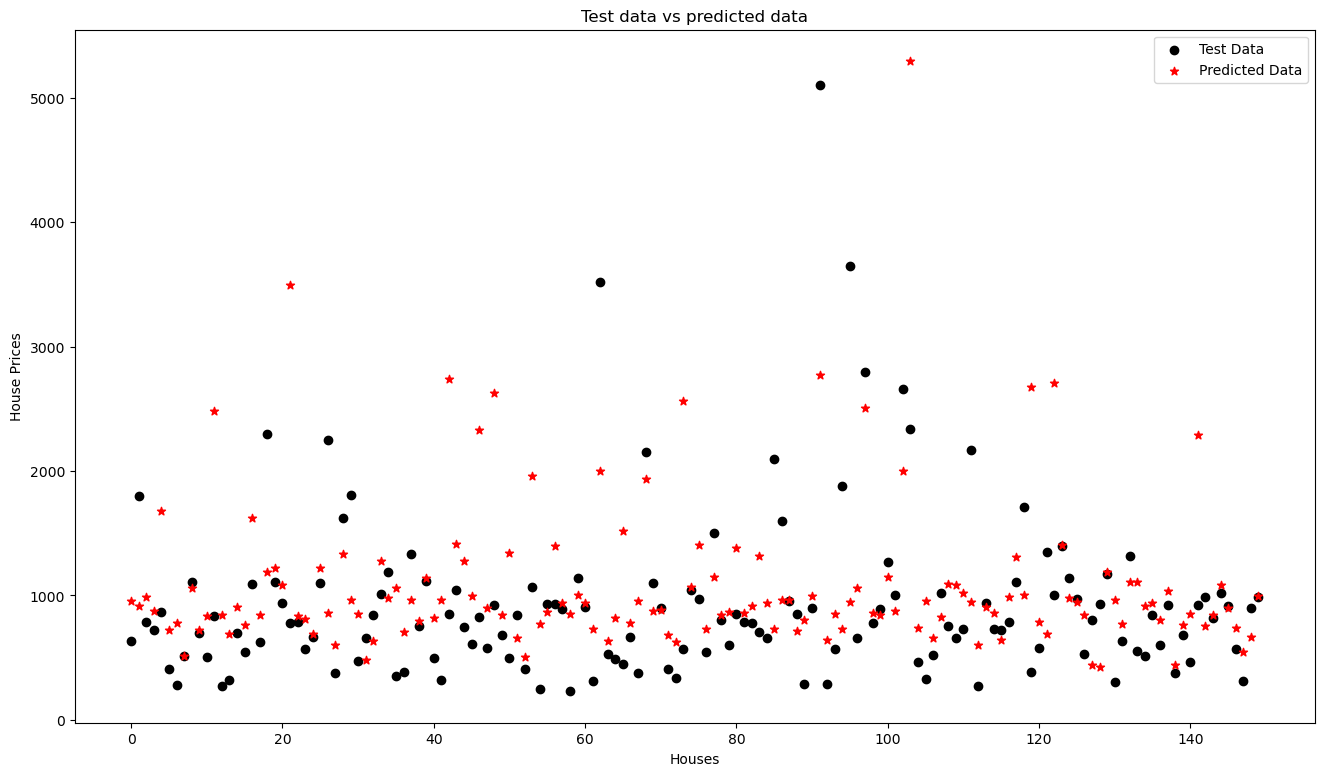

In [18]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(16, 9))

plt.scatter(range(len(y_test[:150])), y_test[:150], color="black", label="Test Data")
plt.scatter(range(len(y_test_pred[:150])), y_test_pred[:150], color="red", marker="*", label="Predicted Data")\

plt.xlabel("Houses")
plt.ylabel("House Prices")
plt.title("Test data vs predicted data")
plt.legend()
plt.show()

# Model Demo
Enter the credentials and the **Model will predict the Price :)**

In [40]:
area = int(input("Enter area of the house (in feet sqr): "))
noOfBedroom = int(input("Enter No. Of Bedroom: "))
resale = 1
liftAvailable = int(input("Enter the no. lift in the Building: "))

df = {"Area": [area], 
      "noOfBedroom": [noOfBedroom], 
      "Resale" : [resale], 
      "LiftAvailable": [liftAvailable]
}

temp = pd.DataFrame(data=df)
pred_y = regr.predict(temp)

print("----------------------------------")
print("Predicted Price = ", int(pred_y * 10), "K")

Enter area of the house (in feet sqr): 889
Enter No. Of Bedroom: 2
Enter the no. lift in the Building: 1
----------------------------------
Predicted Price =  3451 K
